In [8]:
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool as ThreadPool
from multiprocessing import cpu_count
import numpy as np
import pickle
import time

from games.foraging import Foraging
from agents.jalam_agent import JALAMAgent, JALAMAgentConfig

from auxiliar.explorative_agents_training_and_eval import entrenar_agente_tarea, eval_experiments

In [9]:
game_config = [
        "Foraging-4x4-2p-1f-v3",
        "Foraging-6x6-2p-2f-v3",
        "Foraging-6x6-3p-1f-v3",
        "Foraging-6x6-3p-1f-coop-v3",
    ]

In [ ]:
configurations = {
    'fast_jalam_0': {
        'game': game_config[0],
        'agent_0': JALAMAgentConfig(
            start_epsilon=1.0,          # Epsilom inicial
            min_epsilon=0.1,            # Mínimo valor que puede tomar epsilom
            epsilon_decay = 0.9997,     # Decaimiento lineal
            alpha=0.15,                 # Taza de aprendizaje
            gamma=0.95,                 # Factor de descuento
            learn=True,                 # Variable que determina si se esta en étapa de exploración o no (update y epsilom-greedy o política greedy)
            seed=1                      # Semilla para la aleatoriedad
        ),
        'agent_1': JALAMAgentConfig(
            start_epsilon=1.0,          # Epsilom inicial
            min_epsilon=0.1,            # Mínimo valor que puede tomar epsilom
            epsilon_decay = 0.9997,     # Decaimiento lineal
            alpha=0.15,                 # Taza de aprendizaje
            gamma=0.95,                 # Factor de descuento
            learn=True,                 # Variable que determina si se esta en étapa de exploración o no (update y epsilom-greedy o política greedy)
            seed=1                      # Semilla para la aleatoriedad
        ),
        'train_config': {
            'episodes': 1000,
            'iterations': 10,
        }
    },
    'fast_jalam_1': {
        'game': game_config[1],
        'agent_0': JALAMAgentConfig(
            start_epsilon=1.0,      # Epsilom inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar epsilom
            epsilon_decay = 0.9997, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y epsilom-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'agent_1': JALAMAgentConfig(
            start_epsilon=1.0,      # Epsilom inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar epsilom
            epsilon_decay = 0.9997, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y epsilom-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'train_config': {
            'episodes': 1000,
            'iterations': 20,
        }
    },
    'fast_jalam_2': {
        'game': game_config[2],
        'agent_0': JALAMAgentConfig(
            start_epsilon=1.0,      # Epsilom inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar epsilom
            epsilon_decay = 0.9999, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y epsilom-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'agent_1': JALAMAgentConfig(
            start_epsilon=1.0,      # Epsilom inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar epsilom
            epsilon_decay = 0.9999, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y epsilom-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'agent_2': JALAMAgentConfig(
            start_epsilon=1.0,      # Epsilom inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar epsilom
            epsilon_decay = 0.9999, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y epsilom-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'train_config': {
            'episodes': 2000,
            'iterations': 15,
        }
    },
    'fast_jalam_3': {
        'game': game_config[3],
        'agent_0': JALAMAgentConfig(
            start_epsilon=1.0,      # Epsilom inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar epsilom
            epsilon_decay = 0.9999, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y epsilom-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'agent_1': JALAMAgentConfig(
            start_epsilon=1.0,      # Epsilom inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar epsilom
            epsilon_decay = 0.9999, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y epsilom-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'agent_2': JALAMAgentConfig(
            start_epsilon=1.0,      # Epsilom inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar epsilom
            epsilon_decay = 0.15, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y epsilom-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'train_config': {
            'episodes': 2000,
            'iterations': 15,
        }
    }
}

In [11]:
# Alias o nombre de los agentes para cada configuración
agent_alias = None

# Clases de los agentes definidas para cada configuración
agent_classes = {'fast_jalam_0': {'agent_0': JALAMAgent,   'agent_1': JALAMAgent},
                 'fast_jalam_1': {'agent_0': JALAMAgent,   'agent_1': JALAMAgent},
                 'fast_jalam_2': {'agent_0': JALAMAgent,   'agent_1': JALAMAgent,    'agent_2': JALAMAgent},
                 'fast_jalam_3': {'agent_0': JALAMAgent,   'agent_1': JALAMAgent,    'agent_2': JALAMAgent}}

In [12]:
# Armar lista de tareas
tareas = [(config_id, config, agent_classes[config_id], None if agent_alias is None else agent_alias[config_id]) for config_id, config in configurations.items() if config_id]
config_keys = [tarea[0] for tarea in tareas]

# Número de procesos
n_proc = min(len(tareas), cpu_count())

In [ ]:
with ThreadPool(n_proc) as pool:
    resultados = pool.map(entrenar_agente_tarea, tareas)

Agent: agent_0Agent: agent_0
Observation: [1. 2. 3. 2. 3. 1. 5. 1. 1. 4. 2. 1.]
Agent: agent_1
Observation: [1. 2. 3. 5. 1. 1. 2. 3. 1. 4. 2. 1.]
Agent: agent_2
Observation: [1. 2. 3. 4. 2. 1. 2. 3. 1. 5. 1. 1.]

Observation: [2. 1. 5. 3. 0. 2. 4. 0. 2. 2. 5. 2.]
Agent: agent_1
Observation: [2. 1. 5. 4. 0. 2. 3. 0. 2. 2. 5. 2.]
Agent: agent_2
Observation: [2. 1. 5. 2. 5. 2. 3. 0. 2. 4. 0. 2.]
Agent: agent_0
Observation: [3. 4. 2. 4. 2. 1. 0. 4. 1. 1. 1. 1.]
Agent: agent_1
Observation: [3. 4. 2. 4. 2. 1. 1. 1. 1. 0. 4. 1.]


c:\Users\Guillermo\miniconda3\envs\pettingzoo_games\Lib\site-packages\gymnasium\spaces\box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
c:\Users\Guillermo\miniconda3\envs\pettingzoo_games\Lib\site-packages\gymnasium\utils\passive_env_checker.py:275: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'list'>
  logger.warn(


Intentando cargar el experimento: jalam_0
jalam_0 cargado con éxito.
Intentando cargar el experimento: jalam_1
jalam_1 cargado con éxito.
Intentando cargar el experimento: jalam_2
jalam_2 cargado con éxito.
Intentando cargar el experimento: jalam_3
jalam_3 cargado con éxito.
Experiment config: Foraging-5x5-2p-1f-v3


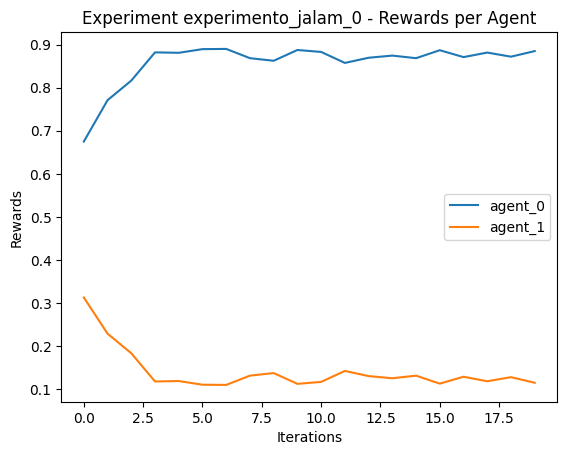

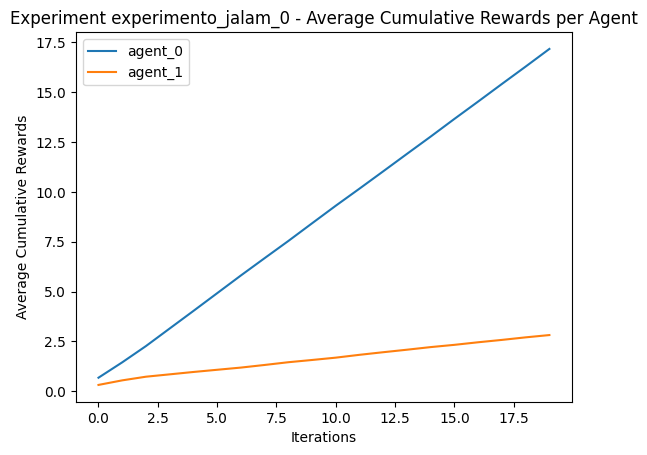

Step: 0
Agent agent_0 observe: [3. 1. 2. 2. 3. 2. 0. 0. 2.]
Agent agent_1 observe: [3. 1. 2. 0. 0. 2. 2. 3. 2.]
Step: 1
Agent agent_0 action: 4 - EAST
Agent agent_0 reward: 0
Agent agent_0 observe: [3. 1. 2. 2. 4. 2. 0. 1. 2.]
Agent agent_1 action: 4 - EAST
Agent agent_1 reward: 0
Agent agent_1 observe: [3. 1. 2. 0. 1. 2. 2. 4. 2.]
Step: 2
Agent agent_0 action: 1 - NORTH
Agent agent_0 reward: 0
Agent agent_0 observe: [3. 1. 2. 1. 4. 2. 1. 1. 2.]
Agent agent_1 action: 2 - SOUTH
Agent agent_1 reward: 0
Agent agent_1 observe: [3. 1. 2. 1. 1. 2. 1. 4. 2.]
Step: 3
Agent agent_0 action: 1 - NORTH
Agent agent_0 reward: 0
Agent agent_0 observe: [3. 1. 2. 0. 4. 2. 1. 2. 2.]
Agent agent_1 action: 4 - EAST
Agent agent_1 reward: 0
Agent agent_1 observe: [3. 1. 2. 1. 2. 2. 0. 4. 2.]
Step: 4
Agent agent_0 action: 0 - NONE
Agent agent_0 reward: 0
Agent agent_0 observe: [3. 1. 2. 0. 4. 2. 1. 1. 2.]
Agent agent_1 action: 3 - WEST
Agent agent_1 reward: 0
Agent agent_1 observe: [3. 1. 2. 1. 1. 2. 0. 4. 2

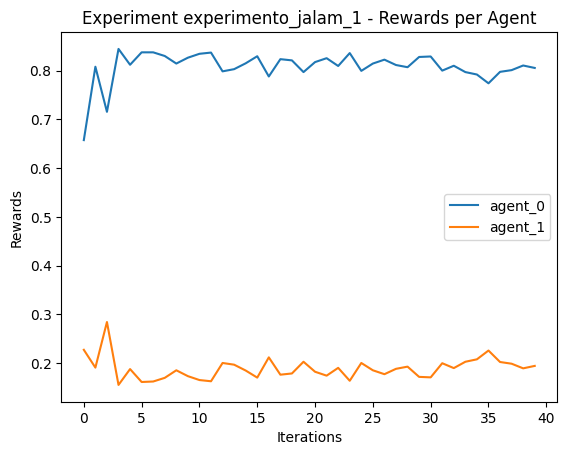

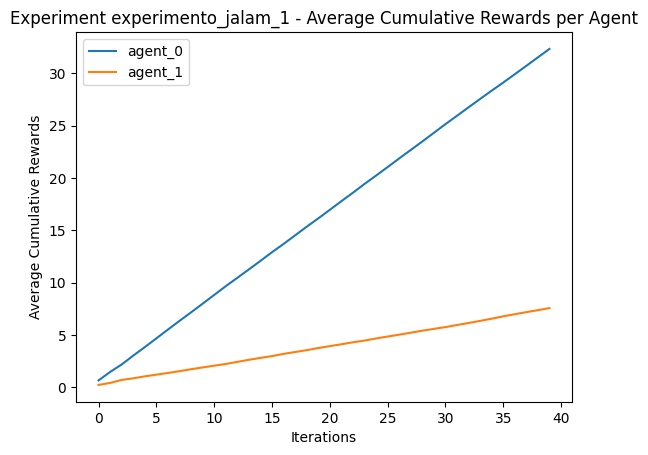

Step: 0
Agent agent_0 observe: [5. 2. 2. 3. 5. 2. 0. 1. 2.]
Agent agent_1 observe: [5. 2. 2. 0. 1. 2. 3. 5. 2.]
Step: 1
Agent agent_0 action: 1 - NORTH
Agent agent_0 reward: 0
Agent agent_0 observe: [5. 2. 2. 2. 5. 2. 0. 2. 2.]
Agent agent_1 action: 4 - EAST
Agent agent_1 reward: 0
Agent agent_1 observe: [5. 2. 2. 0. 2. 2. 2. 5. 2.]
Step: 2
Agent agent_0 action: 2 - SOUTH
Agent agent_0 reward: 0
Agent agent_0 observe: [5. 2. 2. 3. 5. 2. 0. 2. 2.]
Agent agent_1 action: 5 - LOAD
Agent agent_1 reward: 0
Agent agent_1 observe: [5. 2. 2. 0. 2. 2. 3. 5. 2.]
Step: 3
Agent agent_0 action: 0 - NONE
Agent agent_0 reward: 0
Agent agent_0 observe: [5. 2. 2. 3. 5. 2. 0. 1. 2.]
Agent agent_1 action: 3 - WEST
Agent agent_1 reward: 0
Agent agent_1 observe: [5. 2. 2. 0. 1. 2. 3. 5. 2.]
Step: 4
Agent agent_0 action: 3 - WEST
Agent agent_0 reward: 0
Agent agent_0 observe: [5. 2. 2. 3. 4. 2. 1. 1. 2.]
Agent agent_1 action: 2 - SOUTH
Agent agent_1 reward: 0
Agent agent_1 observe: [5. 2. 2. 1. 1. 2. 3. 4. 2

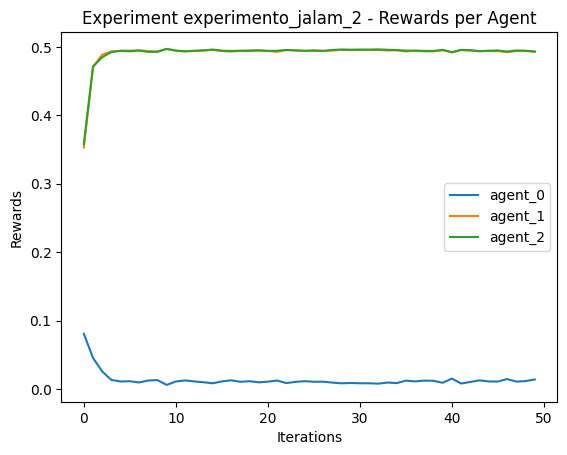

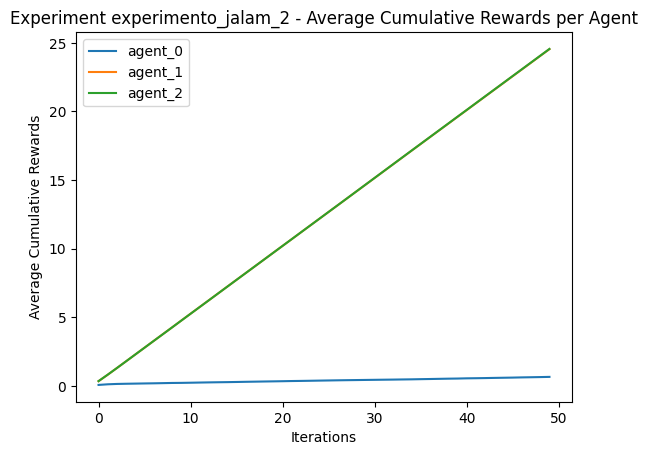

Step: 0
Agent agent_0 observe: [5. 2. 2. 0. 1. 2. 6. 1. 1. 6. 2. 1.]
Agent agent_1 observe: [5. 2. 2. 6. 1. 1. 0. 1. 2. 6. 2. 1.]
Agent agent_2 observe: [5. 2. 2. 6. 2. 1. 0. 1. 2. 6. 1. 1.]
Step: 1
Agent agent_0 action: 5 - LOAD
Agent agent_0 reward: 0
Agent agent_0 observe: [5. 2. 2. 0. 1. 2. 6. 1. 1. 6. 2. 1.]
Agent agent_1 action: 4 - EAST
Agent agent_1 reward: 0
Agent agent_1 observe: [5. 2. 2. 6. 1. 1. 0. 1. 2. 6. 2. 1.]
Agent agent_2 action: 1 - NORTH
Agent agent_2 reward: 0
Agent agent_2 observe: [5. 2. 2. 6. 2. 1. 0. 1. 2. 6. 1. 1.]
Step: 2
Agent agent_0 action: 2 - SOUTH
Agent agent_0 reward: 0
Agent agent_0 observe: [5. 2. 2. 1. 1. 2. 6. 1. 1. 6. 2. 1.]
Agent agent_1 action: 0 - NONE
Agent agent_1 reward: 0
Agent agent_1 observe: [5. 2. 2. 6. 1. 1. 1. 1. 2. 6. 2. 1.]
Agent agent_2 action: 3 - WEST
Agent agent_2 reward: 0
Agent agent_2 observe: [5. 2. 2. 6. 2. 1. 1. 1. 2. 6. 1. 1.]
Step: 3
Agent agent_0 action: 3 - WEST
Agent agent_0 reward: 0
Agent agent_0 observe: [5. 2. 2.

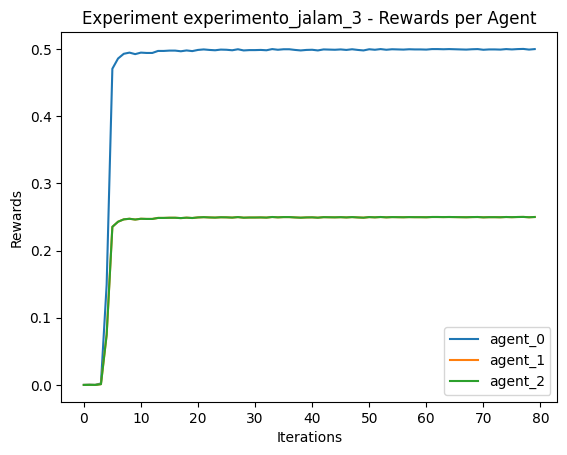

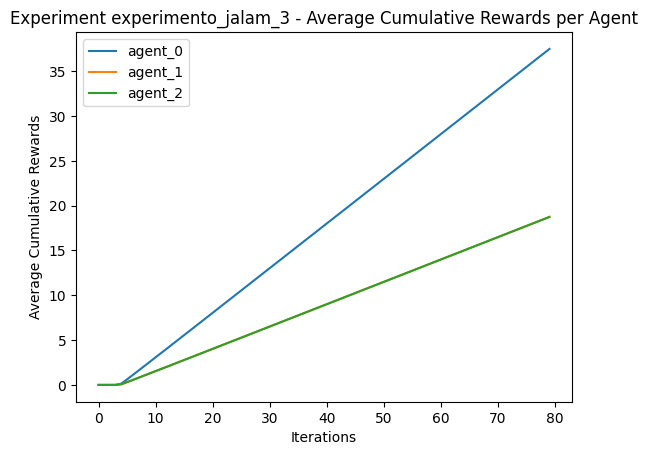

Step: 0
Agent agent_0 observe: [5. 2. 4. 0. 1. 2. 6. 1. 1. 6. 2. 1.]
Agent agent_1 observe: [5. 2. 4. 6. 1. 1. 0. 1. 2. 6. 2. 1.]
Agent agent_2 observe: [5. 2. 4. 6. 2. 1. 0. 1. 2. 6. 1. 1.]
Step: 1
Agent agent_0 action: 4 - EAST
Agent agent_0 reward: 0
Agent agent_0 observe: [5. 2. 4. 0. 2. 2. 6. 0. 1. 6. 1. 1.]
Agent agent_1 action: 3 - WEST
Agent agent_1 reward: 0
Agent agent_1 observe: [5. 2. 4. 6. 0. 1. 0. 2. 2. 6. 1. 1.]
Agent agent_2 action: 3 - WEST
Agent agent_2 reward: 0
Agent agent_2 observe: [5. 2. 4. 6. 1. 1. 0. 2. 2. 6. 0. 1.]
Step: 2
Agent agent_0 action: 0 - NONE
Agent agent_0 reward: 0
Agent agent_0 observe: [5. 2. 4. 0. 2. 2. 6. 0. 1. 6. 1. 1.]
Agent agent_1 action: 5 - LOAD
Agent agent_1 reward: 0
Agent agent_1 observe: [5. 2. 4. 6. 0. 1. 0. 2. 2. 6. 1. 1.]
Agent agent_2 action: 3 - WEST
Agent agent_2 reward: 0
Agent agent_2 observe: [5. 2. 4. 6. 1. 1. 0. 2. 2. 6. 0. 1.]
Step: 3
Agent agent_0 action: 2 - SOUTH
Agent agent_0 reward: 0
Agent agent_0 observe: [5. 2. 4. 

{'experimento_jalam_0': {'agents': {'agent_0': <agents.jalam_agent.JALAMAgent at 0x22a1ce58f90>,
   'agent_1': <agents.jalam_agent.JALAMAgent at 0x22a1d074690>},
  'game': <games.foraging.Foraging at 0x22a1ce664d0>,
  'config': {'game': 'Foraging-5x5-2p-1f-v3',
   'jalam': JALAMAgentConfig(start_epsilon=1.0, min_epsilon=0.1, epsilon_decay=0.99985, alpha=0.15, gamma=0.95, learn=True, seed=1),
   'train_config': {'episodes': 1000, 'iterations': 20}},
  'average_rewards': {'agent_0': [0.675,
    0.771,
    0.8165,
    0.882,
    0.881,
    0.8895,
    0.89,
    0.8685,
    0.8625,
    0.8875,
    0.883,
    0.8575,
    0.8695,
    0.8745,
    0.8685,
    0.887,
    0.871,
    0.8815,
    0.872,
    0.885],
   'agent_1': [0.313,
    0.229,
    0.1835,
    0.118,
    0.119,
    0.1105,
    0.11,
    0.1315,
    0.1375,
    0.1125,
    0.117,
    0.1425,
    0.1305,
    0.1255,
    0.1315,
    0.113,
    0.129,
    0.1185,
    0.128,
    0.115]}},
 'experimento_jalam_1': {'agents': {'agent_0

In [ ]:
experiments_names = config_keys # Usar nombre de las tareas recién ejecutadas o elegir a mano
eval_experiments(experiments_names)